# Lab 16 - Bootstrap and confidence intervals

For this lab, we will use data from a sample of babies born between 1960 and 1967 in California hospitals.  The data can be downloaded from [here](https://www.stat.berkeley.edu/~statlabs/data/babies.data).  For reference, this file and a description of the columns is on the page [https://www.stat.berkeley.edu/~statlabs/labs.html](https://www.stat.berkeley.edu/~statlabs/labs.html), under the heading "Maternal Smoking and Infant Health II".  

This lab closely follows [Chapter 13.3 in Computational and Inferential Thinking: The Foundations of Data Science](https://www.inferentialthinking.com/chapters/13/3/Confidence_Intervals.html) by Ani Adhikari and John DeNero.

Open the data file in TextEdit (found under Applications in Finder). What do you notice about it?  How are the columns separated? 

The columns are: 

- bwt: Birth weight in ounces (999 unknown)
- gestation: Length of pregnancy in days (999 unknown)
- parity: 0= first born, 9=unknown
- age: mother's age in years
- height: mother's height in inches (99 unknown)
- weight: Mother's prepregnancy weight in pounds (999 unknown)
- smoke: Smoking status of mother:  0=not now, 1=yes now, 9=unknown

First, let's import the necessary libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In the data file, the columns are separated by whitespace (ex. spaces, tabs, etc.) instead of by commas, as usual.  We can still use `pd.read_csv()` but need to add the parameter `sep = "\s+"` to tell the function that the columns are separated one or more whitespaces. 

Read `babies.data` into the dataframe `babies` using this parameter `sep = "\s+"` and check it worked correctly.

In [3]:
babies = pd.read_csv("../../data/babies.data", sep = "\s+")
babies.head()

,bwt,gestation,parity,age,height,weight,smoke
0,120,284,0,27,62,100,0
1,113,282,0,33,64,135,0
2,128,279,0,28,64,115,1
3,123,999,0,36,69,190,0
4,108,282,0,23,67,125,1


How big is the sample?  We will use this later.

In [4]:
babies.shape[0]

1236

<details> <summary>Pattern:</summary>
<code>
df.shape[0]</code>
</details>

## 95% confidence interval for median birth weight to number of gestational days ratio

We would like to understand the relation between birth weight, which is given in ounces, and the number of gestational days.  Smaller babies often need more medical care, and it would be helpful to be able to estimate a baby's weight before it is born.

We'll look at the ratio of birth weight to number of gestational days.  For the first row, this ratio is:
$\frac{\text{120 oz}}{\text{284 days}} \approx \text{0.4225 ounces per day}$

Let's make a new column of the birth weight to number of gestational days ratio.  Recall from Lab 2 that we can do column-wise math operations.

In [5]:
babies["Ratio BW/GD"] = babies["bwt"]/babies["gestation"]

<details> <summary>Answer</summary>
<code>
babies["Ratio BW/GD"] = babies["bwt"]/babies["gestation"]
</code>
</details>

Plot a histogram of these ratios:

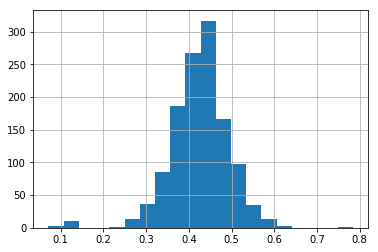

In [7]:
babies["Ratio BW/GD"].hist(bins = 20)

We see in the histogram that there are some very low and very high ratios, which are *outliers*.  Because of these extreme values we should use a robust measure of center, namely the median.  Compute the median of the ratios.

In [8]:
babies["Ratio BW/GD"].median()

0.42832681017612523

<details> <summary>Pattern:</summary>
<code>
df["column_name"].median()
</code>
</details>

This is the median ratio of the sample, but what is the median ratio of the population?  We will estimate a range for it, called the *95% confidence interval*, by creating more samples from the sample we have.  This process of creating more data with the same distribution as our existing data is called *bootstrapping*.

Above we found that our sample size is 1236.  Sampling *with replacement* means that we can choose the same row more than once (the row is replaced once we have chosen it). 

Steps for computing the 95% confidence interval:
1. Take a random sample of size 1236 from our sample, by sampling *with replacement*, and compute the median of the new sample.
2. Repeat Step 1 until we have computed 5000 sample medians, which we save in a list.
3. Compute the middle 95% of these medians.

####  Step 1: Take a random sample of size 1236 from our sample, by sampling *with replacement*, and compute the median of the new sample.

To re-sample with replacement from our original sample, we still use the `.sample()` function, but add the parameter `replace = True`.

Take a sample of size 1236 with replacement from the `babies` dataframe, and store it in the dataframe `bootstrap_sample`.

In [9]:
bootstrap_sample = babies.sample(1236, replace = True)

<details> <summary>Answer</summary>
<code>
bootstrap_sample = babies.sample(1236, replace = True)</code>
</details>

Check that `bootstrap_sample` was created correctly by displaying it.

In [10]:
bootstrap_sample

,bwt,gestation,parity,age,height,weight,smoke,Ratio BW/GD
677,131,274,0,28,64,118,1,0.478102
956,130,276,0,41,68,130,0,0.471014
230,111,284,0,22,99,999,1,0.390845
769,137,318,1,19,64,110,0,0.430818
300,80,266,1,25,62,125,0,0.300752
765,91,279,1,27,62,118,0,0.326165
22,137,287,0,25,66,145,0,0.477352
119,100,243,0,39,65,170,1,0.411523
840,98,262,0,22,67,120,0,0.374046
1077,121,282,0,30,65,122,0,0.429078


Take the median ratio of the sample:

In [11]:
bootstrap_sample["Ratio BW/GD"].median()

0.4280821917808219

How does this median compare to the median of the original data?  The two medians should be similar.

#### Step 2:  Take 5,000 samples and compute the median for each as in Step 1.  Store these medians in a list.

This step is similiar to what we have done in previous labs, just with a different computation inside the loop.

The pseudo-code is:
<code>
 new_list = []
 for i in range(num_of_loops):
     take bootstrap sample
     compute median of ratio in bootstrap sample
     add median to new_list
</code>

In [16]:
medians = []
for i in range(5000):
    bootstrap_sample = babies.sample(1236, replace = True)
    sample_median = bootstrap_sample["Ratio BW/GD"].median()
    medians.append(sample_median)

Plot the medians as a histogram, remembering to convert the list into a Pandas Series first:

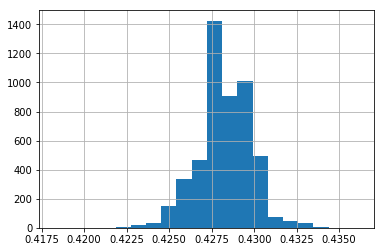

In [17]:
pd.Series(medians).hist(bins = 20)

<details> <summary>Pattern:</summary>
<code>
pd.Series(median_list).hist()</code>
</details>

What do you notice about the distribution?  What is the range of the distribution?  

#### Step 3:  Compute the middle 95% of these medians.

To get the interval containing the middle 95% of our sample medians, we compute the 2.5 percentile, which is the sample median such that 2.5% of the sample medians are below it, and the 97.5 percentile, which is the sample median such that 97.5% of the sample medians are below it.

Pandas has a function for computing *quantiles* which are the percentiles divided by 100.  ie. the 2.5 percentile is the 0.025 quantile and the 97.5 percentile is the 0.975 quantile.

Type `pd.Series(medians).quantile(0.025)` below to compute the 0.025 quantile.

In [18]:
pd.Series(medians).quantile(0.025)

0.4251401738808455

Now compute the 0.975 quantile:

In [19]:
pd.Series(medians).quantile(0.975)

0.43103448275862066

The 95% confidence interval is [0.425,0.431] from my calculations.  Yours may differ slightly because we use random sampling to compute this interval.

Technically this interval is an *approximation* of the 95% confidence interval that you may have seen in another statistics class.

*Interpretation of the 95% confidence interval*: If we repeated this procedure for computing the 95% confidence interval on many different original samples from the population, then 95% of the intervals would contain the true population median.

This method for computing the 95% confidence interval also works for means and proportions.  It may not work well if:
- the sample size is small (say less than 10 or 15)
- the population distribution of the statistic is not roughly bell shaped
- we are trying to estimate a statistic that is greatly influenced by outliers or rare elements, like the maximum data value

## 95% confidence interval of the proportion of mothers who smoke

Now we will use bootstrapping to compute the 95% confidence interval of the proportion of mothers who smoke.

First estimate the proportion of mothers who smoke in our sample, by computing:
$$\text{proportion of mothers who smoke} = \frac{\text{# of birth where mother smoked}}{\text{total # of births}}$$

Calculate the number of births where mother smoked:

In [26]:
smoker_filter = babies["smoke"] == 1
num_smoke = smoker_filter.sum()
num_smoke

484

<details> <summary>Hint:</summary>
Use a filter to find the rows with 1 in the `smoke` column.  
</details>

We computed the total number of births at the start of the lab.

Compute the proportion of mothers who smoke:

In [27]:
num_smoke/1236

0.39158576051779936

Now use bootstrapping to compute a 95% confidence interval for the proportion of mothers who smoke.

#### Step 1 and 2: Re-sample from the sample and compute the proportion of mothers who smoke for each bootstrap sample.

The pseudo-code is:
<code>
 new_list = []
 for i in range(num_of_loops):
     take bootstrap sample
     compute proportion of mothers who smoke in bootstrap sample
     add proportion to new_list
</code>

In [29]:
proportions = []
for i in range(5000):
    bootstrap_sample = babies.sample(1236, replace=True)
    smoke_filter = bootstrap_sample["smoke"] == 1
    num_smoke = smoke_filter.sum()
    proportion = num_smoke/1236
    proportions.append(proportion)

<details> <summary>Answer:</summary>
<code>
proportions = []
for i in range(5000):
    bootstrap_sample = babies.sample(1236, replace=True)
    smoke_filter = bootstrap_sample["smoke"] == 1
    num_smoke = smoke_filter.sum()
    proportion = num_smoke/1236
    proportions.append(proportion)
</code>    
</details>

Plot a histogram of the proportions, remembering to make the list into a Pandas Series first.

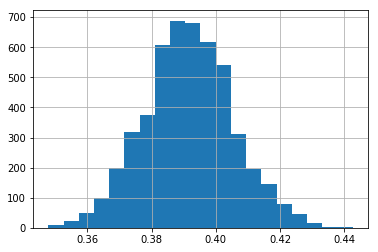

In [30]:
pd.Series(proportions).hist(bins = 20)

#### Step 3: Compute the 95% confidence interval for the proportions

Find the 0.025 quantile and the 0.975 quantile to get the interval.

In [31]:
pd.Series(proportions).quantile(0.025)

0.3648867313915858

<details> <summary>Pattern:</summary>
pd.Series(list_of_sample_statistic).quantile(desired_quantile)
</details>

In [32]:
pd.Series(proportions).quantile(0.025)

0.3648867313915858

What is your 95% confidence interval?

*Interpretation of the 95% confidence interval*: If we repeated this (random) procedure for computing the 95% confidence interval multiple times, then approximately 95% of the confidence intervals computed would contain the true proportion of mothers who smoke in the population.

### Challenges: 
- Find the 95% confidence interval for the age of the mothers in the sample.
- Find the 95% confidence interval for the mean birth weight in the sample.